In [50]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy
import random

# My Tools
from toolkit.tools import (
    print_column_uniques,
    make_df,
    get_column_uniques,
    explode_pie,
    percentage_to_normal,
)


%matplotlib inline

In [51]:
# Reseting figure size params.
plt.rcParams["figure.figsize"] = [12, 7]

In [52]:
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [53]:
# Creating the dataset.
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [54]:
# COLORS
# ============================
# Light
color_hombres_light = "#8ecae6"
color_mujeres_light = "#ffafcc"
color_neutro_light = "#d4a373"
# Dark
color_hombres_dark = "#023047"
color_mujeres_dark = "#ff006e"
color_neutro_dark = "#ffb703"

In [55]:
df.shape

(342, 25)

# Education

    - About the "education level" of the people who answered the survey.

## General Education
    - column name : 'educacion'

In [56]:
ed_levels = get_column_uniques(df, "educacion")
ed_levels

['Ed. Universitaria',
 'Ed. Secundaria',
 'Master',
 'Doctorado',
 'Ed. Basica',
 'Autodidacta']

## Education levels counts.

In [57]:
for i in ed_levels:
    ed_df = df[df["educacion"].str.contains(i)]["educacion"]
    print(f"Educacion : {i}.\nTamaño: {ed_df.size} \n\n")

Educacion : Ed. Universitaria.
Tamaño: 279 


Educacion : Ed. Secundaria.
Tamaño: 130 


Educacion : Master.
Tamaño: 38 


Educacion : Doctorado.
Tamaño: 2 


Educacion : Ed. Basica.
Tamaño: 107 


Educacion : Autodidacta.
Tamaño: 94 




## Carers or Specialties
    - column name : 'carr_especialidades'

          categorias  conteo
0            Ninguna      16
1   Ing. Electrónica       8
2         Otras Ing.       6
3  Análisis de Sist.     151
4       Programación     111
5   Ing. Informática     169
6              Otras      32
7         Ing. Civil       1
8     Diseño Gráfico      13
9         Matemático       2







<Figure size 648x360 with 0 Axes>

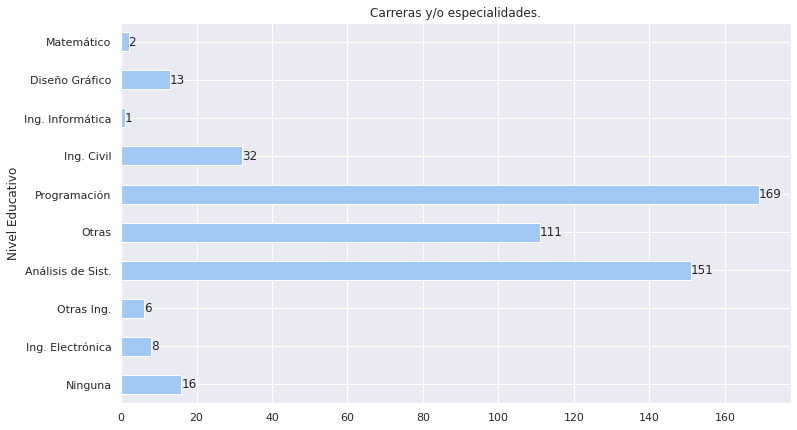

In [59]:
# Making a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Declaring the plot.
carr_esp_df = make_df(df, "carr_especialidades", "categorias", "conteo")

print(carr_esp_df)
print("\n" * 4)


carr_esp_plot = carr_esp_df.plot(
    kind="barh",
    title="Carreras y/o especialidades.",
    xlabel="Nivel Educativo",
    legend=False,
)

carr_esp_uniques = get_column_uniques(df, "carr_especialidades")


carr_esp_plot.set_yticks([k for k, v in enumerate(carr_esp_uniques)], minor=False)
carr_esp_plot.set_yticklabels(
    [i for i in carr_esp_uniques],
    fontdict=None,
    minor=False,
)

cat_values = [i for i in carr_esp_df.conteo.value_counts().keys()]


# Plot annotations.
for k, v in enumerate(cat_values):
    carr_esp_plot.annotate(v, (v, k), va="center")

    # nv_ed_plot.annotate(v, (v,k),va='center')

plt.show()

In [60]:
carr_esp_uniques = get_column_uniques(df, "carr_especialidades")

In [61]:
carr_esp_uniques
print(len(carr_esp_uniques))

10


## Importance of Formal Education
    - column name : 'imp_ed_formal'

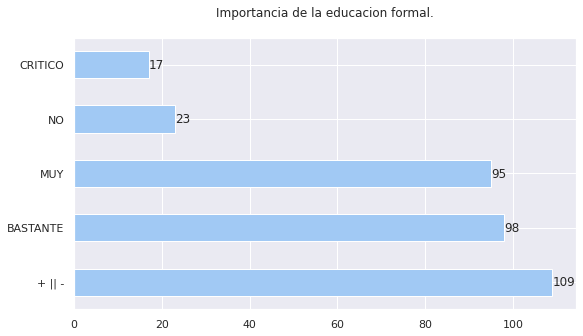

In [90]:
# Ploting a figure for this column.
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)
# Plot
exp_df = df["imp_ed_formal"].value_counts()
exp_plot = exp_df.plot(kind="barh", title=f"Importancia de la educacion formal.\n")

# Plot annotations.
for k, v in enumerate(df["imp_ed_formal"].value_counts().values):
    exp_plot.annotate(v, (v, k), va="center")
plt.show()

## Educational Level x Gender

    - We explore the "educational level" of the people who answered the survey by gender.

In [63]:
# Making groups by gender.
gen = df.groupby("genero")

In [64]:
# Print genders keys.
df["genero"].value_counts().keys()

Index(['HOMBRE', 'MUJER', 'NO COMPARTO'], dtype='object')

### Education Level - HOMBRE
    - Education level for the group of MENS. 

In [65]:
# Available Columns:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

In [66]:
# Print group 'HOMBRE' and the column 'educacion' with its value counts.
gen.get_group("HOMBRE")["educacion"].value_counts()

Ed. Universitaria                                                           117
Ed. Basica;Ed. Secundaria;Ed. Universitaria                                  37
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Autodidacta                      31
Ed. Universitaria;Autodidacta                                                23
Master                                                                       15
Ed. Secundaria                                                               10
Ed. Basica;Ed. Secundaria                                                     9
Ed. Basica;Ed. Secundaria;Autodidacta                                         8
Ed. Secundaria;Autodidacta                                                    7
Ed. Universitaria;Master                                                      6
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Master                            4
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Master;Autodidacta                2
Autodidacta                             

In [67]:
ed_uniques = get_column_uniques(df, "educacion")

          categories  count
0  Ed. Universitaria    226
1     Ed. Secundaria    113
2             Master     32
3          Doctorado      2
4         Ed. Basica     93
5        Autodidacta     78


<Figure size 648x360 with 0 Axes>

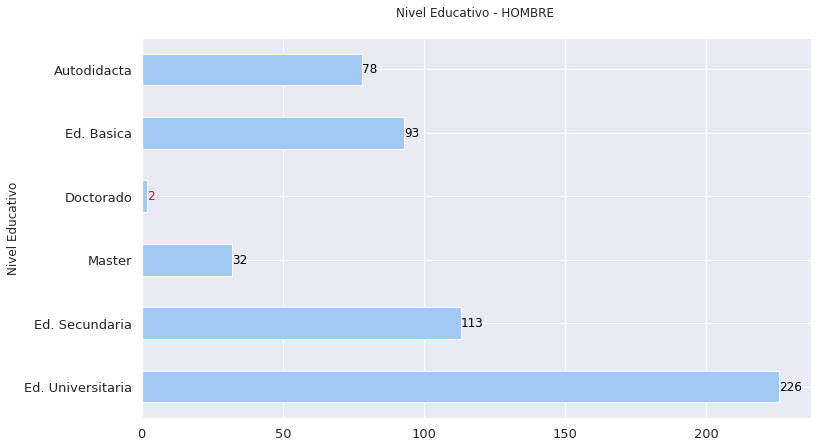

In [68]:
# Making a plot for this 'relation'.
fig = plt.figure(figsize=(9, 5))
# Plot
ed_hombres_df = make_df(gen.get_group("HOMBRE"), "educacion", "categories", "count")
ed_hombres_plot = ed_hombres_df.plot(
    kind="barh",
    title="Nivel Educativo - HOMBRE \n",
    xlabel="Nivel Educativo",
    fontsize=13,
    legend=False,
)

print(ed_hombres_df)
ed_hombres_plot.set_yticklabels([v for k, v in enumerate(ed_uniques)])

# Plot annotations.
for k, v in enumerate(ed_hombres_df["count"]):
    if v < 10:
        # if count its less than 10, value will be painted in 'red'.
        ed_hombres_plot.annotate(v, (v, k), va="center", color="red")
    else:
        # if count its greather than 10, value will be painted in 'blue'.
        ed_hombres_plot.annotate(v, (v, k), va="center", color="black")
plt.show()

### Careers or Specialties - HOMBRE

    - Column name : 'carr_especialidades'

In [69]:
# Print 'value counts' of this column.
gen.get_group("HOMBRE")["carr_especialidades"].value_counts()

Ing. Informática                                                        92
Análisis de Sist.                                                       52
Programación;Análisis de Sist.                                          22
Programación;Ing. Informática                                           17
Programación;Análisis de Sist.;Ing. Informática                         15
Programación                                                            15
Ninguna                                                                 13
Análisis de Sist.;Ing. Informática                                       7
Ing. Electrónica                                                         5
Programación;Análisis de Sist.;Otras                                     5
Ing. Informática;Otras                                                   4
Otras Ing.                                                               4
Análisis de Sist.;Otras                                                  3
Otras                    

            Category  count
0            Ninguna     14
1   Ing. Electrónica      7
2         Otras Ing.      5
3  Análisis de Sist.    115
4       Programación     90
5   Ing. Informática    143
6              Otras     29
7     Diseño Gráfico     11
8         Matemático      2


<Figure size 648x360 with 0 Axes>

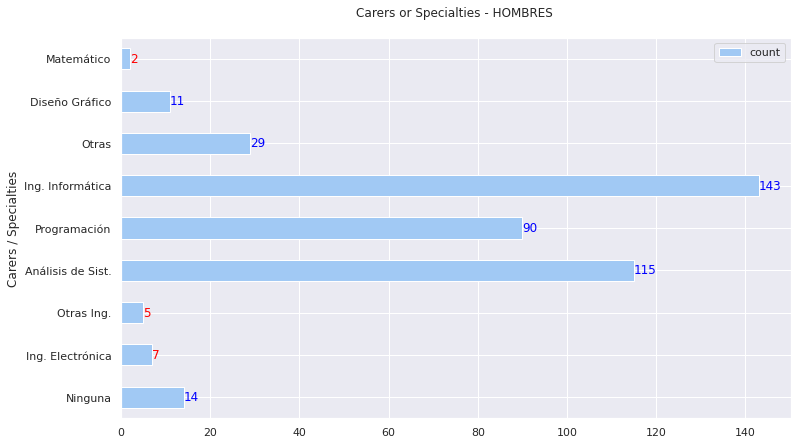

In [70]:
# Making a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Plot
carr_hombres_df = make_df(
    gen.get_group("HOMBRE"), "carr_especialidades", "Category", "count"
)
carr_hombres_plot = carr_hombres_df.plot(
    kind="barh",
    title="Carers or Specialties - HOMBRES \n",
    xlabel="Carers / Specialties",
)

print(carr_hombres_df)
carr_hombres_plot.set_yticklabels(
    [v for k, v in enumerate(carr_hombres_df["Category"])]
)


# Plot annotations.
for k, v in enumerate(carr_hombres_df["count"]):
    if v < 10:
        # If count its less than 10, value will be painted in 'red'.
        carr_hombres_plot.annotate(v, (v, k), va="center", color="red")
    else:
        # If count its greather than 10, value will be painted in 'blue'.
        carr_hombres_plot.annotate(v, (v, k), va="center", color="blue")
plt.show()

 - NOTE: There is a theoretical or scope conflict within the content of this column. A career is an academic degree and a specialty is a branch of knowledge within a career. Within the column the category "programacion, ninguna, Otras" are presented. It makes no sense to consider them.

### Importance of formal education. - HOMBRES

In [71]:
# Print the 'normal count' of values in the column.
df["imp_ed_formal"].value_counts()

+ || -      109
BASTANTE     98
MUY          95
NO           23
CRITICO      17
Name: imp_ed_formal, dtype: int64

In [72]:
# Any null value?
df["imp_ed_formal"].isna().sum()

0

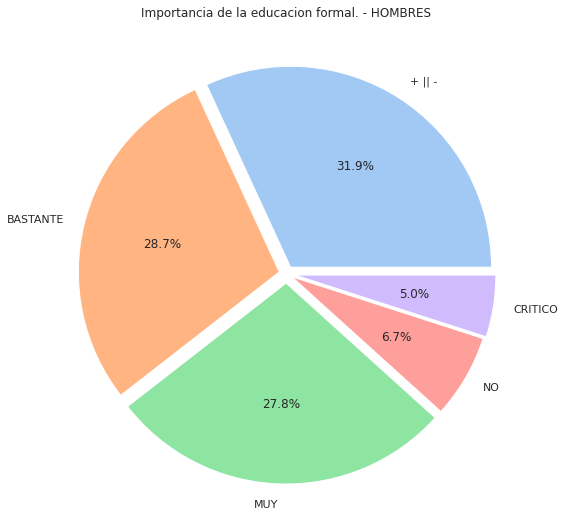

In [73]:
# Making a chart for this column.
fig = plt.figure(figsize=(9, 30))
ax1 = plt.subplot(111)
# Plot
import_df = (
    df["imp_ed_formal"]
    .value_counts(normalize=True)
    .plot(
        kind="pie",
        title="Importancia de la educacion formal. - HOMBRES",
        autopct="%1.1f%%",
        ylabel="",
        xlabel="",
        explode=[
            random.uniform(0.03, 0.05) for i in get_column_uniques(df, "imp_ed_formal")
        ],
    )
)
# Plot annotations.
for k, v in enumerate(df["imp_ed_formal"].value_counts().values):
    if v < 10:
        import_df.annotate(v, (v, k), va="center", color="red")
    else:
        import_df.annotate(v, (v, k), va="center", color="black")
plt.show()

### EDUCACION - MUJERES

In [74]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

 - Grouped in this way, the content of the column makes no sense. We will try to separate each "category".

In [75]:
gen.get_group("MUJER")["educacion"].value_counts()

Ed. Universitaria                                          29
Ed. Universitaria;Autodidacta                               5
Ed. Basica;Ed. Secundaria;Ed. Universitaria                 5
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Autodidacta     3
Ed. Universitaria;Master                                    2
Master                                                      2
Master;Autodidacta                                          1
Ed. Basica;Ed. Secundaria                                   1
Ed. Secundaria                                              1
Name: educacion, dtype: int64

          categories  count
0  Ed. Universitaria     44
1     Ed. Secundaria     10
2             Master      5
3         Ed. Basica      9
4        Autodidacta      9


<Figure size 648x360 with 0 Axes>

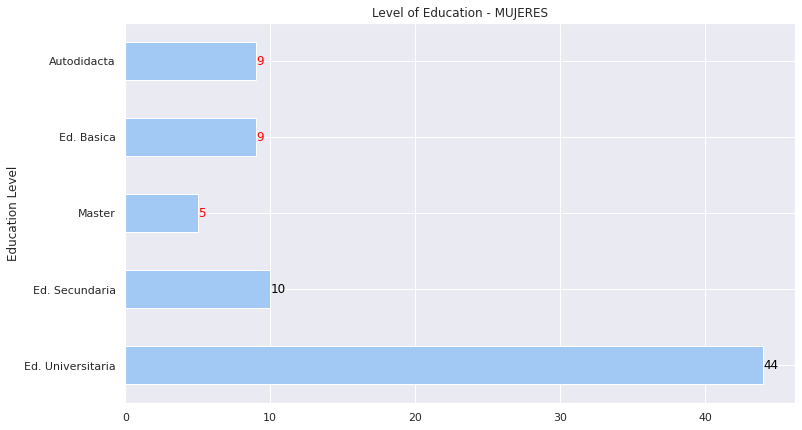

In [76]:
fig = plt.figure(figsize=(9, 5))


ed_mujeres_df = make_df(gen.get_group("MUJER"), "educacion", "categories", "count")
ed_mujeres_plot = ed_mujeres_df.plot(
    kind="barh",
    title="Level of Education - MUJERES",
    ylabel="Education Level",
    legend=False,
)

print(ed_mujeres_df)
ed_mujeres_plot.set_yticklabels([v for k, v in enumerate(ed_mujeres_df["categories"])])


for k, v in enumerate([i for i in ed_mujeres_df["count"]]):
    if v < 10:
        ed_mujeres_plot.annotate(v, (v, k), va="center", color="red")
    else:
        ed_mujeres_plot.annotate(v, (v, k), va="center", color="black")

plt.show()

### Carreras o especialidades. - MUJERES
 - column name : 'carr_especialidades'

          categories  count
0  Análisis de Sist.     27
1       Programación     15
2   Ing. Informática     22
3              Otras      2
4     Diseño Gráfico      1


<Figure size 648x360 with 0 Axes>

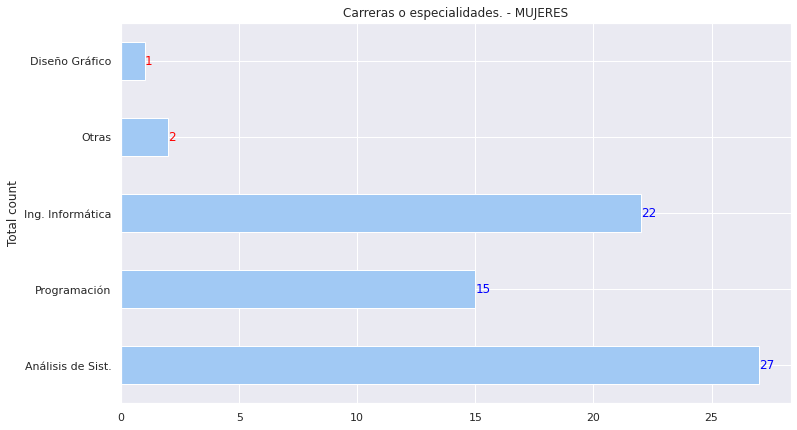

In [77]:
fig = plt.figure(figsize=(9, 5))


carr_mujeres_df = make_df(
    gen.get_group("MUJER"), "carr_especialidades", "categories", "count"
)
carr_mujeres_plot = carr_mujeres_df.plot(
    kind="barh",
    ylabel="Carers / Specialties",
    xlabel="Total count",
    title="Carreras o especialidades. - MUJERES",
    legend=False,
)

print(carr_mujeres_df)
carr_mujeres_plot.set_yticklabels(
    [v for k, v in enumerate(carr_mujeres_df["categories"])]
)

for k, v in enumerate([i for i in carr_mujeres_df["count"]]):
    if v < 10:
        carr_mujeres_plot.annotate(v, (v, k), va="center", color="red")
    else:
        carr_mujeres_plot.annotate(v, (v, k), va="center", color="blue")

plt.show()

# Importancia de la educacion formal. - MUJERES

 - column name : 'imp_ed_formal'

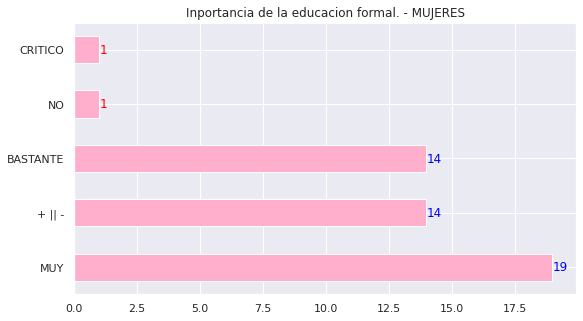

In [78]:
fig = plt.figure(figsize=(9, 5))

muj_import_df = (
    gen.get_group("MUJER")["imp_ed_formal"]
    .value_counts()
    .plot(
        kind="barh",
        title="Inportancia de la educacion formal. - MUJERES",
        color=color_mujeres_light,
    )
)

for k, v in enumerate(gen.get_group("MUJER")["imp_ed_formal"].value_counts().values):
    if v < 10:
        muj_import_df.annotate(v, (v, k), va="center", color="red")
    else:
        muj_import_df.annotate(v, (v, k), va="center", color="blue")

plt.show()

### EDUCACION - NO COMPARTO

In [79]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

          categories  count
0         Ed. Basica      2
1        Autodidacta      2
2  Ed. Universitaria      4
3     Ed. Secundaria      3


<Figure size 648x360 with 0 Axes>

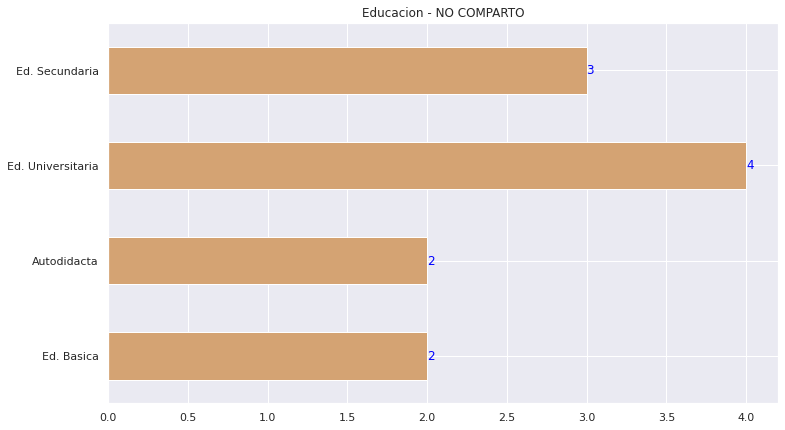

In [80]:
fig = plt.figure(figsize=(9, 5))
ed_no_comp_df = make_df(
    gen.get_group("NO COMPARTO"), "educacion", "categories", "count"
)

ed_no_comp_plot = ed_no_comp_df.plot(
    kind="barh", title="Educacion - NO COMPARTO", color=color_neutro_light, legend=False
)


print(ed_no_comp_df)
ed_no_comp_plot.set_yticklabels([v for k, v in enumerate(ed_no_comp_df["categories"])])


for k, v in enumerate([i for i in ed_no_comp_df["count"]]):
    ed_no_comp_plot.annotate(v, (v, k), va="center", color="blue")

plt.show()

### Carreras o especialidades. - NO DEFINIDO

           categoria  cuenta
0            Ninguna       1
1   Ing. Electrónica       1
2         Otras Ing.       1
3  Análisis de Sist.       3
4       Programación       2
5         Ing. Civil       1
6   Ing. Informática       1
7     Diseño Gráfico       1


<Figure size 648x360 with 0 Axes>

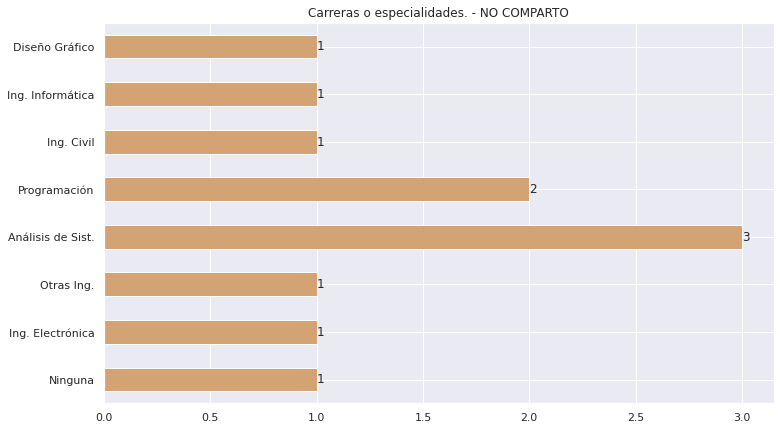

In [81]:
fig = plt.figure(figsize=(9, 5))


carr_no_comp_df = make_df(
    gen.get_group("NO COMPARTO"), "carr_especialidades", "categoria", "cuenta"
)
carr_no_comp_plot = carr_no_comp_df.plot(
    kind="barh",
    title="Carreras o especialidades. - NO COMPARTO",
    color=color_neutro_light,
    legend=False,
)


print(carr_no_comp_df)
carr_no_comp_plot.set_yticklabels(
    [v for k, v in enumerate(carr_no_comp_df["categoria"])]
)


for k, v in enumerate([i for i in carr_no_comp_df["cuenta"]]):
    carr_no_comp_plot.annotate(v, (v, k), va="center")

plt.show()

### Importancia de la educacion formal. - NO DEFINIDO

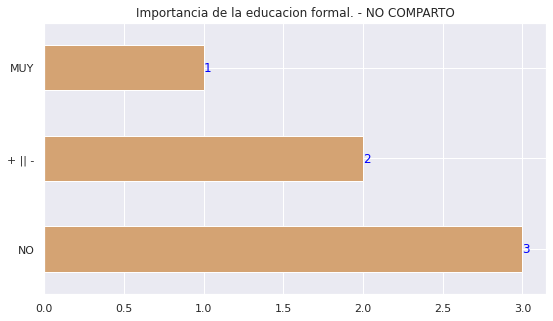

In [82]:
fig = plt.figure(figsize=(9, 5))
imp_ed_no_comp = (
    gen.get_group("NO COMPARTO")["imp_ed_formal"]
    .value_counts()
    .plot(
        kind="barh",
        title="Importancia de la educacion formal. - NO COMPARTO",
        color=color_neutro_light,
    )
)

for k, v in enumerate(
    [i for i in gen.get_group("NO COMPARTO")["imp_ed_formal"].value_counts().values]
):
    imp_ed_no_comp.annotate(v, (v, k), va="center", color="blue")

plt.show()

In [83]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

# IMPORTANCIA DE LA EDUCACION FORMAL - COMPARATIVAS

columna --------> 'imp_ed_formal'

In [84]:
generos = gen.groups.keys()

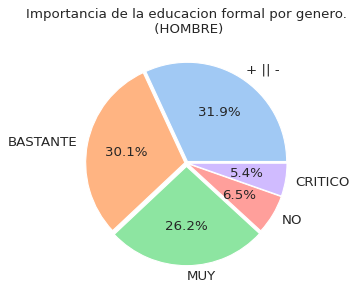

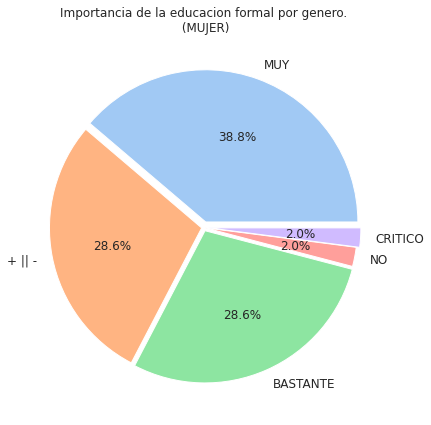

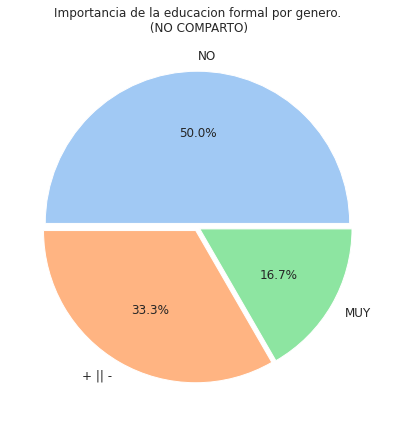

In [85]:
plt.figure(figsize=(4, 20), dpi=80)


for k, v in enumerate(generos):
    # plt.subplot(2, 2, k + 1)
    ie_df = gen.get_group(v)["imp_ed_formal"].value_counts(normalize=True)
    ie_plot = ie_df.plot(
        kind="pie",
        ylabel="",
        autopct="%1.1f%%",
        explode=explode_pie(ie_df.size),
        textprops={"fontsize": 12},
        title=f"Importancia de la educacion formal por genero.\n ({v})",
    )
    plt.show()

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.3, wspace=0.4, hspace=0.4)

In [86]:
for k, v in enumerate(generos):
    ie_df = gen.get_group(v)["imp_ed_formal"].value_counts(normalize=True)
    print(f"Genero : {v}\n Importancia de la educacion formal.")
    print("=" * 33)
    print(percentage_to_normal(ie_df))
    print("\n" * 4)

Genero : HOMBRE
 Importancia de la educacion formal.
+ || -      31.9 %
BASTANTE    30.1 %
MUY         26.2 %
NO           6.5 %
CRITICO      5.4 %
Name: imp_ed_formal, dtype: object





Genero : MUJER
 Importancia de la educacion formal.
MUY         38.8 %
+ || -      28.6 %
BASTANTE    28.6 %
NO           2.0 %
CRITICO      2.0 %
Name: imp_ed_formal, dtype: object





Genero : NO COMPARTO
 Importancia de la educacion formal.
NO        50.0 %
+ || -    33.3 %
MUY       16.7 %
Name: imp_ed_formal, dtype: object





